# 連續變數特徵工程

本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請執行至少兩種特徵縮放或特徵標準化方法，並繪製出直方圖探討執行前後數值特徵的變化。
3. 請執行特徵區間化，並說明您是使用哪一種標準決定數值範圍，每個類別的範圍分別為何。
4. 請使用至少三種不同的連續變數填補技巧，將遺失值填補完成。

> 請注意：本次作業需求目標與範例程式碼相同，加上開放題會因資料集個案有不同的處理技巧，因此不額外提供解答程式碼，學員如對本次作業有問題可參考範例程式碼，或至問題討論區提問。

In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [329]:
raw_data=pd.read_csv("C:/Users/Orianna/Desktop/marathon/application_train.csv")
data=raw_data.copy()
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [331]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [332]:
def z_score(data):
    return  (data-data.mean())/data.std()


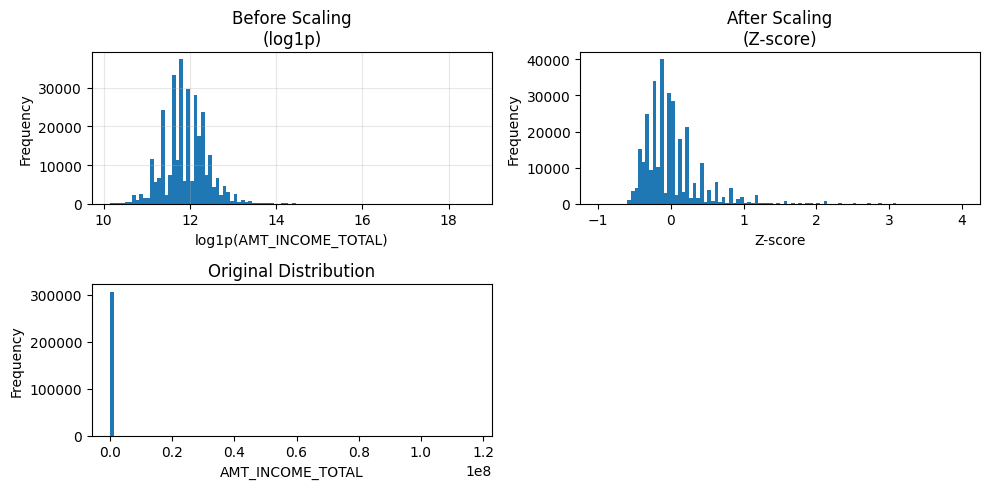

In [333]:
income = data['AMT_INCOME_TOTAL'].dropna().astype(float)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

axes[0, 0].hist(
    np.log1p(income),
    bins=100,
)
axes[0, 0].set_title('Before Scaling\n(log1p)')
axes[0, 0].set_xlabel('log1p(AMT_INCOME_TOTAL)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)


axes[0, 1].hist(
    z_score(income),
    bins=100,
    range=(-1, 4),
)
axes[0, 1].set_title('After Scaling\n(Z-score)')
axes[0, 1].set_xlabel('Z-score')
axes[0, 1].set_ylabel('Frequency')


axes[1, 0].hist(
    income,
    bins=100,
)
axes[1, 0].set_title('Original Distribution')
axes[1, 0].set_xlabel('AMT_INCOME_TOTAL')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()


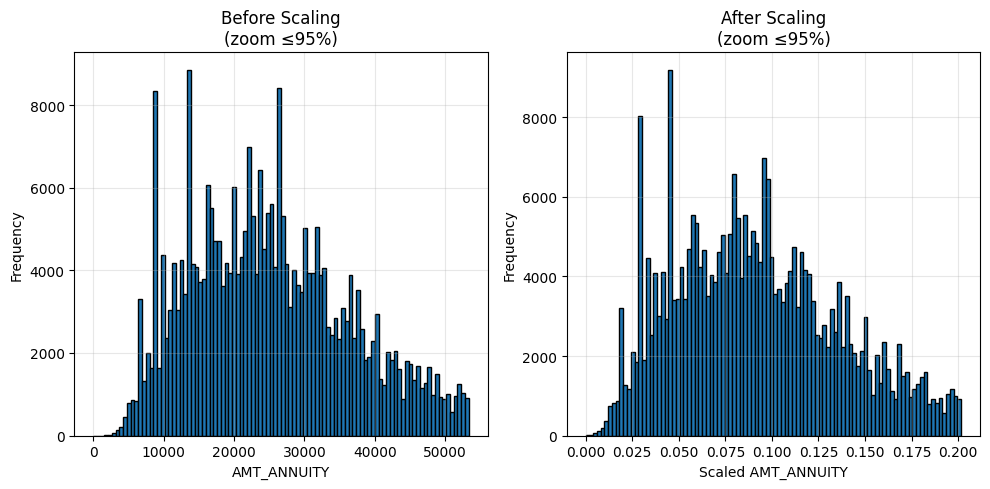

In [334]:
annuity = data['AMT_ANNUITY'].dropna().astype(float)
scaled_annuity = (annuity - annuity.min()) / (annuity.max() - annuity.min())
plt.figure(figsize=(10,5))


plt.subplot(1,2,1)
plt.hist(
    annuity,
    bins=100,            #
    range=(0, annuity.quantile(0.95)),  
    edgecolor='k',
   
)
plt.title('Before Scaling\n(zoom ≤95%)')
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)


plt.subplot(1,2,2)
plt.hist(
    scaled_annuity,
    bins=100,
    range=(0, scaled_annuity.quantile(0.95)), 
    edgecolor='k',
    
)
plt.title('After Scaling\n(zoom ≤95%)')
plt.xlabel('Scaled AMT_ANNUITY')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [335]:
#請執行特徵區間化，並說明您是使用哪一種標準決定數值範圍，每個類別的範圍分別為何。
def equal(data,bins=5):
    return pd.cut(data,bins=bins,include_lowest=True)

data['AMT_ANNUITY_bin']=equal(data['AMT_ANNUITY'].dropna().astype(float),bins=5)
counts=data['AMT_ANNUITY_bin'].value_counts().sort_index()
counts

#將特徵分為五區間，根據小至大的數值排列。

AMT_ANNUITY_bin
(1359.089, 52897.5]     291408
(52897.5, 104179.5]      15667
(104179.5, 155461.5]       363
(155461.5, 206743.5]        27
(206743.5, 258025.5]        34
Name: count, dtype: int64

In [336]:
data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()


41519

In [337]:
data.fillna({'AMT_REQ_CREDIT_BUREAU_WEEK':data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean()},inplace=True)

In [338]:
data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [339]:
data['AMT_ANNUITY'].isnull().sum()

12

In [340]:
data.fillna({'AMT_ANNUITY':data['AMT_ANNUITY'].median()},inplace=True)


In [341]:
data['AMT_ANNUITY'].isnull().sum()

0

In [342]:
data['AMT_GOODS_PRICE'].isnull().sum()

278

In [343]:
data.fillna({'AMT_GOODS_PRICE':data['AMT_GOODS_PRICE'].median()},inplace=True)


In [344]:
data['AMT_GOODS_PRICE'].isnull().sum()

0